In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mpitree.tree import DecisionTreeClassifier

np.random.seed(42)


In [16]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X, y = iris.data.iloc[:, :2], iris.target

In [17]:
clf = DecisionTreeClassifier(max_depth=4).fit(X, y)
print(clf)

┌── sepal length (cm)
│  ├── sepal width (cm) [> 5.50]
│  │  ├── sepal length (cm) [> 3.40]
│  │  │  └── 2 [> 6.50]
│  │  │  └── 0 [<= 6.50]
│  │  ├── sepal length (cm) [<= 3.40]
│  │  │  ├── sepal length (cm) [> 6.20]
│  │  │  │  └── 2 [> 7.05]
│  │  │  │  └── 2 [<= 7.05]
│  │  │  ├── sepal length (cm) [<= 6.20]
│  │  │  │  └── 1 [> 5.70]
│  │  │  │  └── 1 [<= 5.70]
│  ├── sepal width (cm) [<= 5.50]
│  │  ├── sepal width (cm) [> 2.80]
│  │  │  ├── sepal length (cm) [<= 3.00]
│  │  │  │  └── 1 [> 5.20]
│  │  │  │  └── 0 [<= 5.20]
│  │  │  └── 0 [> 3.00]
│  │  ├── sepal length (cm) [<= 2.80]
│  │  │  ├── sepal length (cm) [<= 4.90]
│  │  │  │  └── 1 [> 4.70]
│  │  │  │  └── 0 [<= 4.70]
│  │  │  └── 1 [> 4.90]


In [5]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

X = np.insert(X, 0, [[1.75, -0.3]], axis=0)
y = np.insert(y, 0, [0], axis=0)

In [6]:
clf = DecisionTreeClassifier().fit(X, y)
print(clf)

┌── feature_1
│  ├── feature_0 [> 0.02]
│  │  ├── feature_1 [<= 1.42]
│  │  │  ├── feature_0 [<= 0.71]
│  │  │  │  ├── feature_0 [<= 0.31]
│  │  │  │  │  └── 1 [> -0.40]
│  │  │  │  │  └── 0 [<= -0.40]
│  │  │  │  └── 0 [> 0.31]
│  │  │  └── 0 [> 0.71]
│  │  └── 1 [> 1.42]
│  ├── feature_0 [<= 0.02]
│  │  ├── feature_1 [> -0.51]
│  │  │  ├── feature_1 [> -0.31]
│  │  │  │  ├── feature_1 [> -0.29]
│  │  │  │  │  ├── feature_1 [<= -0.12]
│  │  │  │  │  │  └── 0 [> -0.14]
│  │  │  │  │  │  └── 1 [<= -0.14]
│  │  │  │  │  └── 1 [> -0.12]
│  │  │  │  └── 0 [<= -0.29]
│  │  │  └── 1 [<= -0.31]
│  │  └── 0 [<= -0.51]


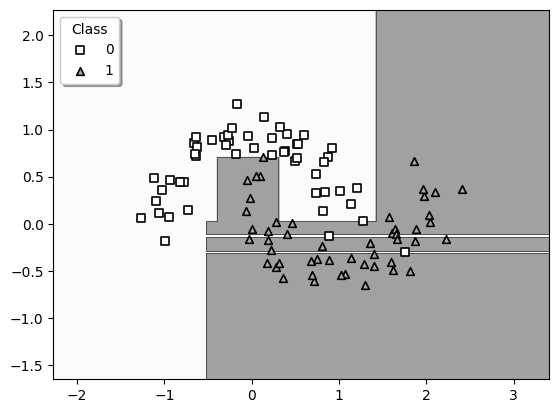

In [7]:
n_classes = np.unique(y)
colors = "w", "darkgray"
markers = "s", "^"

plt.figure()

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap="Greys")

for t, c, marker in zip(n_classes, colors, markers):
    plt.scatter(
        X[y == t, 0],
        X[y == t, 1],
        c=c,
        s=30,
        linewidth=1.2,
        marker=marker,
        edgecolors="k",
        label=t,
    )

plt.legend(title="Class", loc="upper left", shadow=True)
plt.show()